# Alzheimer_Prediction_Model

# Import Libraries & Dataset

In [1]:
import pandas as pda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'alzheimers_disease_data.csv')

In [3]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


# Dataset Basic Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

###### Table of Contents	
Patient Information	
Patient ID	
Demographic Details	
* Patient ID : A unique identifier assigned to each patient (4751 to 6900).
* Age : The age of the patients ranges from 60 to 90 years.
* Gender	: Gender of the patients, where 0 represents Male and 1 represents Female.
* Ethnicity : The ethnicity of the patients, coded as follows:*0: Caucasian*1: African American*2: Asian*3: Other
* EducationLevel : The education level of the patients, coded as follows:*0: None*1: High School*2: Bachelor's*3: Higher
##### Lifestyle Factors	
* BMI : Body Mass Index of the patients, ranging from 15 to 40.
* Smoking : Smoking status, where 0 indicates No and 1 indicates Yes.
* AlcoholConsumption : Weekly alcohol consumption in units, ranging from 0 to 20.
* PhysicalActivity : Weekly physical activity in hours, ranging from 0 to 10.
* DietQuality : Diet quality score, ranging from 0 to 10.
* SleepQuality : Sleep quality score, ranging from 4 to 10.
##### Medical History	
* FamilyHistoryAlzheimers : Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
* CardiovascularDisease : Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
* Diabetes : Presence of diabetes, where 0 indicates No and 1 indicates Yes.
* Depression : Presence of depression, where 0 indicates No and 1 indicates Yes.
* HeadInjury : History of head injury, where 0 indicates No and 1 indicates Yes.
* Hypertension : Presence of hypertension, where 0 indicates No and 1 indicates Yes.
##### Clinical Measurements	
* SystolicBP : Systolic blood pressure, ranging from 90 to 180 mmHg.
* DiastolicBP : Diastolic blood pressure, ranging from 60 to 120 mmHg.
* CholesterolTotal : Total cholesterol levels, ranging from 150 to 300 mg/dL.
* CholesterolLDL : Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
* CholesterolHDL : High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
* CholesterolTriglycerides : Triglycerides levels, ranging from 50 to 400 mg/dL.
##### Cognitive and Functional Assessments	
* MMSE : Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
* FunctionalAssessment : Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
* MemoryComplaints : Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
* BehavioralProblems : Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
* ADL : Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.
##### Symptoms	
* Confusion : Presence of confusion, where 0 indicates No and 1 indicates Yes.
* Disorientation : Presence of disorientation, where 0 indicates No and 1 indicates Yes.
* PersonalityChanges : Presence of personality changes, where 0 indicates No and 1 indicates Yes.
* DifficultyCompletingTasks : Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
* Forgetfulness : Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.
##### Diagnosis Information	
* Diagnosis : Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
##### Confidential Information	
* DoctorInCharge : This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

# Datatypes

In [7]:
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [8]:
# Numeric Features
print(f"Number of Numeric Features: {len(df.select_dtypes(include=['int', 'float']).columns)}")
print("-"*50)
print(f"Numeric Feature's Name: \n{df.select_dtypes(include=['int', 'float']).columns}")

Number of Numeric Features: 34
--------------------------------------------------
Numeric Feature's Name: 
Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis'],
      dtype='object')


In [9]:
# Categorical Features
print(f"Number of Categorical Features: {len(df.select_dtypes(include=['object']).columns)}")
print("-"*50)
print(f"Categorical Feature's Name: \n{df.select_dtypes(include=['object']).columns}")

Number of Categorical Features: 1
--------------------------------------------------
Categorical Feature's Name: 
Index(['DoctorInCharge'], dtype='object')


# Drop DoctorInCharge

In [11]:
# As it is obiviously clear that DoctorInCharge variable does not provide
# Any insightful information, we can drop this variable.
df = df.drop(columns=['DoctorInCharge'], axis=1)
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


### NOTE:
* There is only 1 Categorical feature with label of object in this dataset, but with further analysis we can simply understand that we ham some other categorical features , but their datatypes are "int". Such as "Gender", "Ethnicity", "Smoking", etc.

In [12]:
df.nunique()

PatientID                    2149
Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation

# Missing Values & Duplicates

In [14]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [15]:
df.duplicated().sum()

0

# Statistical Analysis

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


* PatientID: Patient IDs range from 4751 to 6900.
* Age: Patients are aged between 60 and 90, with an average of 75 years.
* Gender: Nearly equal distribution between males and females.
* Ethnicity: Most patients are Caucasian, with a few African American, Asian, and other ethnicities.
* EducationLevel: Most patients have a high school or bachelor's degree.
* BMI: Ranges from 15 to 40, with an average of 27.7.
* Smoking & AlcoholConsumption: About 29% smoke; alcohol consumption averages 10 units/week.
* PhysicalActivity & DietQuality: Patients average about 5 hours of activity and a diet quality score of 5.
* SleepQuality: Average sleep quality score is 7.
* Medical History: Family history of Alzheimer's (~25%), cardiovascular disease (~14%), diabetes (~15%), depression (~20%), head injury (~9%), hypertension (~15%).
* Blood Pressure & Cholesterol: Average systolic BP is 134 mmHg, diastolic BP is 90 mmHg, total cholesterol is 225 mg/dL.
* Cognitive/Functional Assessments: MMSE average is 15; functional assessment averages 5.
* Symptoms: Confusion (~20%), memory complaints (~21%), and forgetfulness (~30%) are reported.
* Diagnosis: About 35% of patients are diagnosed with Alzheimer's.

# Analyze On Diagnosis

In [18]:
# Group by 'Diagnosis' and get the mean for all columns
mean_stats = df.groupby('Diagnosis').mean()

# Display result
mean_stats.to_csv("stats-by-diagnosis.csv")

# NOTE:
* As there are lots of columns=, i have export grouped information to a csv file in order to check and analyze them better

In [19]:
df.groupby('Diagnosis').agg(['mean']).T

,Diagnosis,0,1
PatientID,mean,5806.177106,5859.401316
Age,mean,74.945284,74.842105
Gender,mean,0.514039,0.492105
Ethnicity,mean,0.708423,0.677632
EducationLevel,mean,1.316055,1.232895
BMI,mean,27.515092,27.912670
Smoking,mean,0.290137,0.285526
AlcoholConsumption,mean,10.071880,9.980156
PhysicalActivity,mean,4.907640,4.943160
DietQuality,mean,4.974839,5.026581


# EDA
## Seperating Variables

In [20]:
categorical_features = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation',
'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

In [21]:
numeric_features = [col for col in df.columns if col not in categorical_features]

In [22]:
print(f"Numeric Features: {len(numeric_features)}")
print("-"*50)
print(f"Categorical Features: {len(categorical_features)}")

Numeric Features: 12
--------------------------------------------------
Categorical Features: 22


# Barplot

In [23]:
def countplot(col):
    plt.figure(figsize=(6, 5))
    sns.set_style("darkgrid")
    sns.countplot(data=df,
                x=col,
                palette='dark',
                width=0.5)
    plt.title(f"{col}'s Countplot",
              fontsize=14,
              weight="bold")
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Count", fontsize=10)
    plt.show()

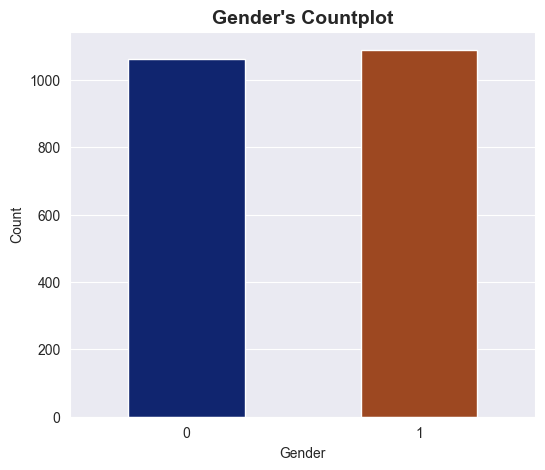

In [24]:
countplot("Gender")

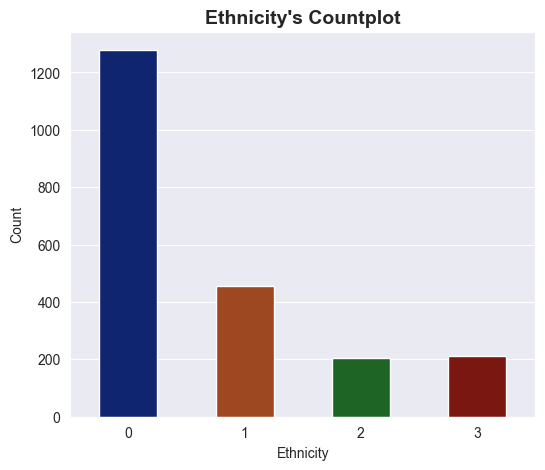

In [25]:
countplot('Ethnicity')

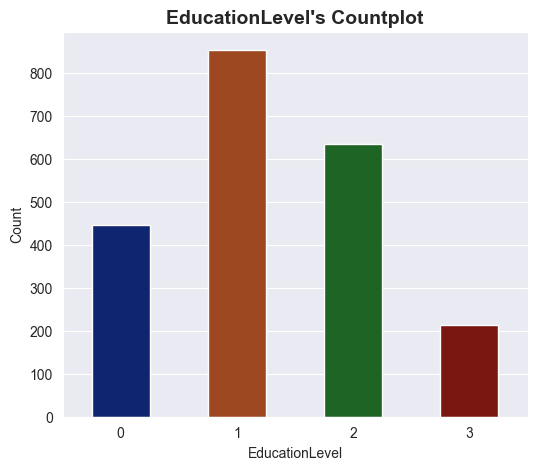

In [26]:
countplot('EducationLevel')

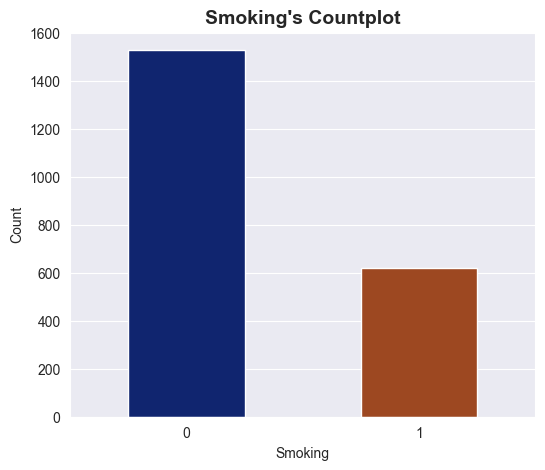

In [28]:
countplot('Smoking')

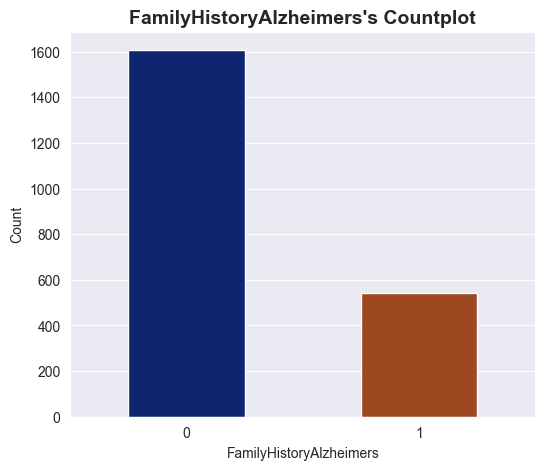

In [32]:
countplot('FamilyHistoryAlzheimers')

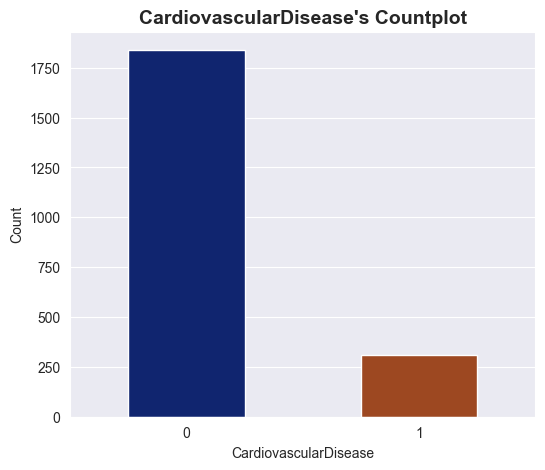

In [34]:
countplot('CardiovascularDisease')

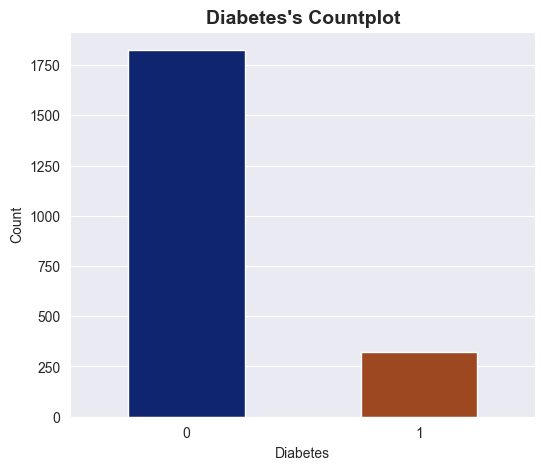

In [35]:
countplot('Diabetes')

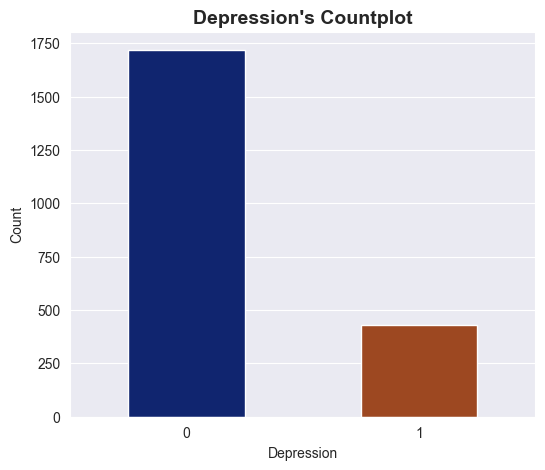

In [36]:
countplot('Depression')

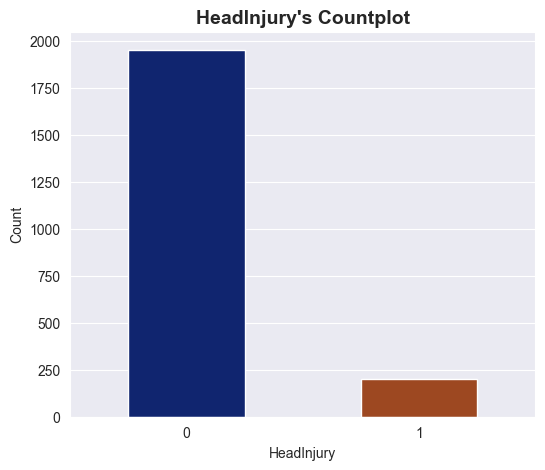

In [37]:
countplot('HeadInjury')

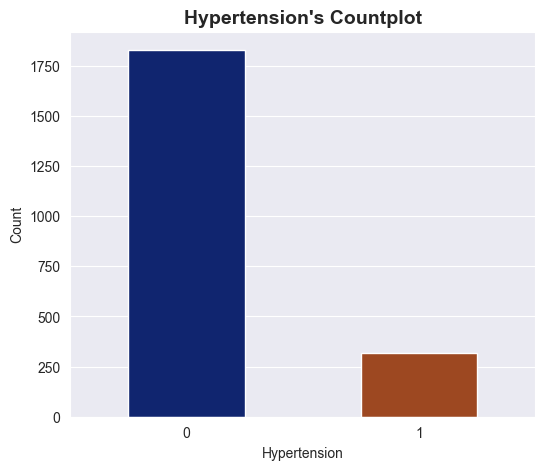

In [38]:
countplot('Hypertension')

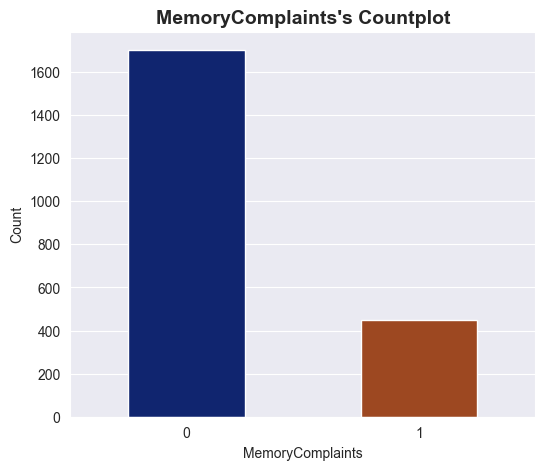

In [39]:
countplot('MemoryComplaints')

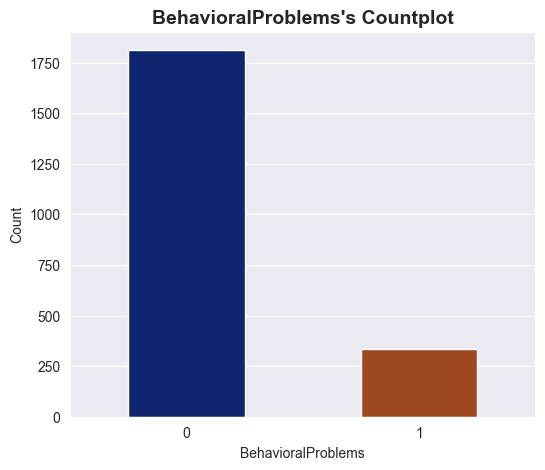

In [40]:
countplot('BehavioralProblems')

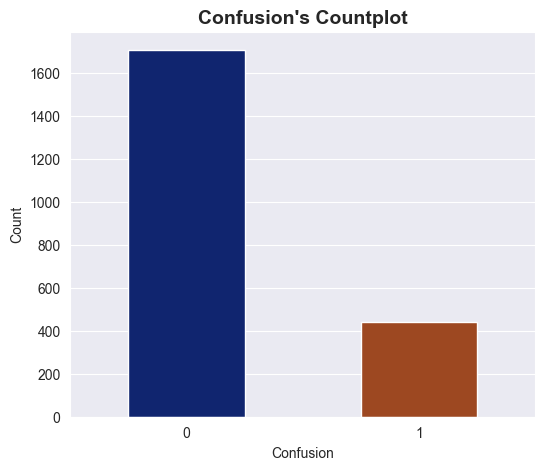

In [41]:
countplot('Confusion')

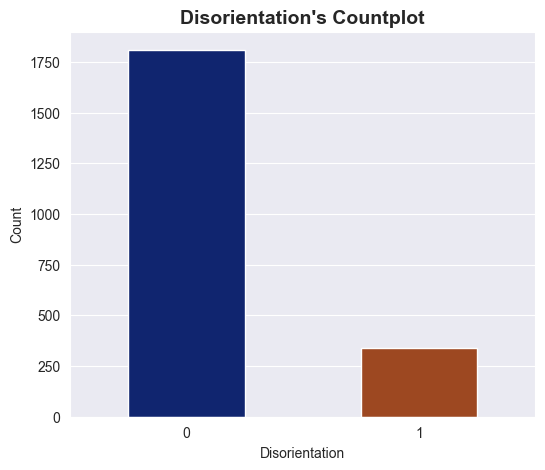

In [42]:
countplot('Disorientation')

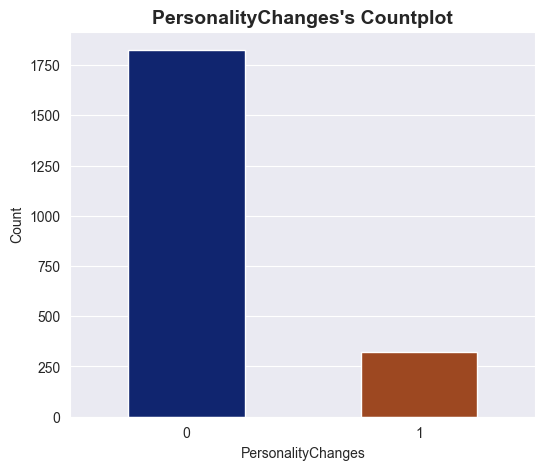

In [43]:
countplot('PersonalityChanges')

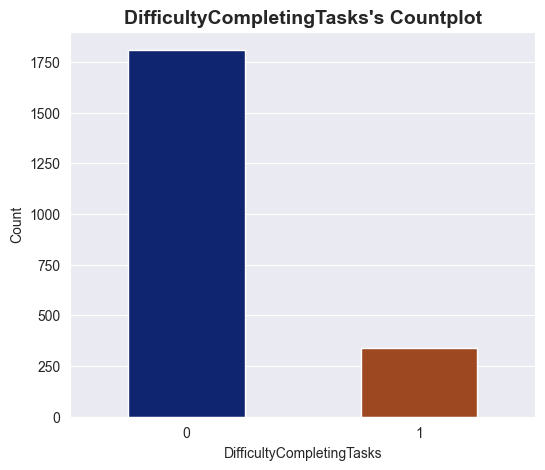

In [44]:
countplot("DifficultyCompletingTasks")

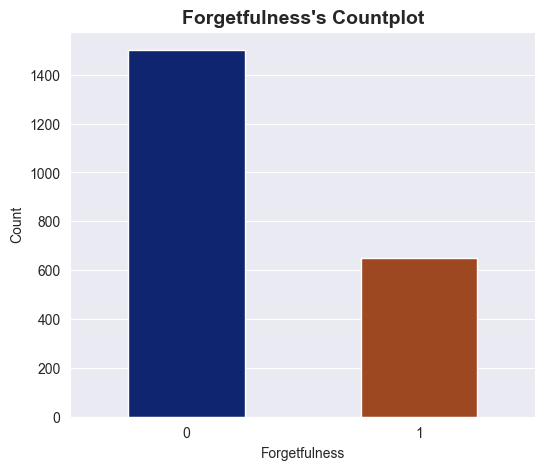

In [45]:
countplot("Forgetfulness")

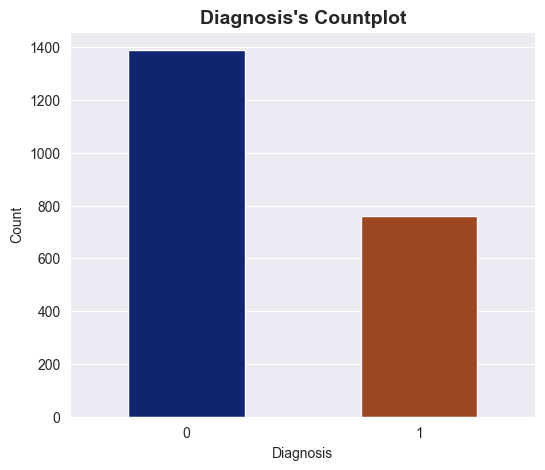

In [46]:
countplot("Diagnosis")

# Distributions

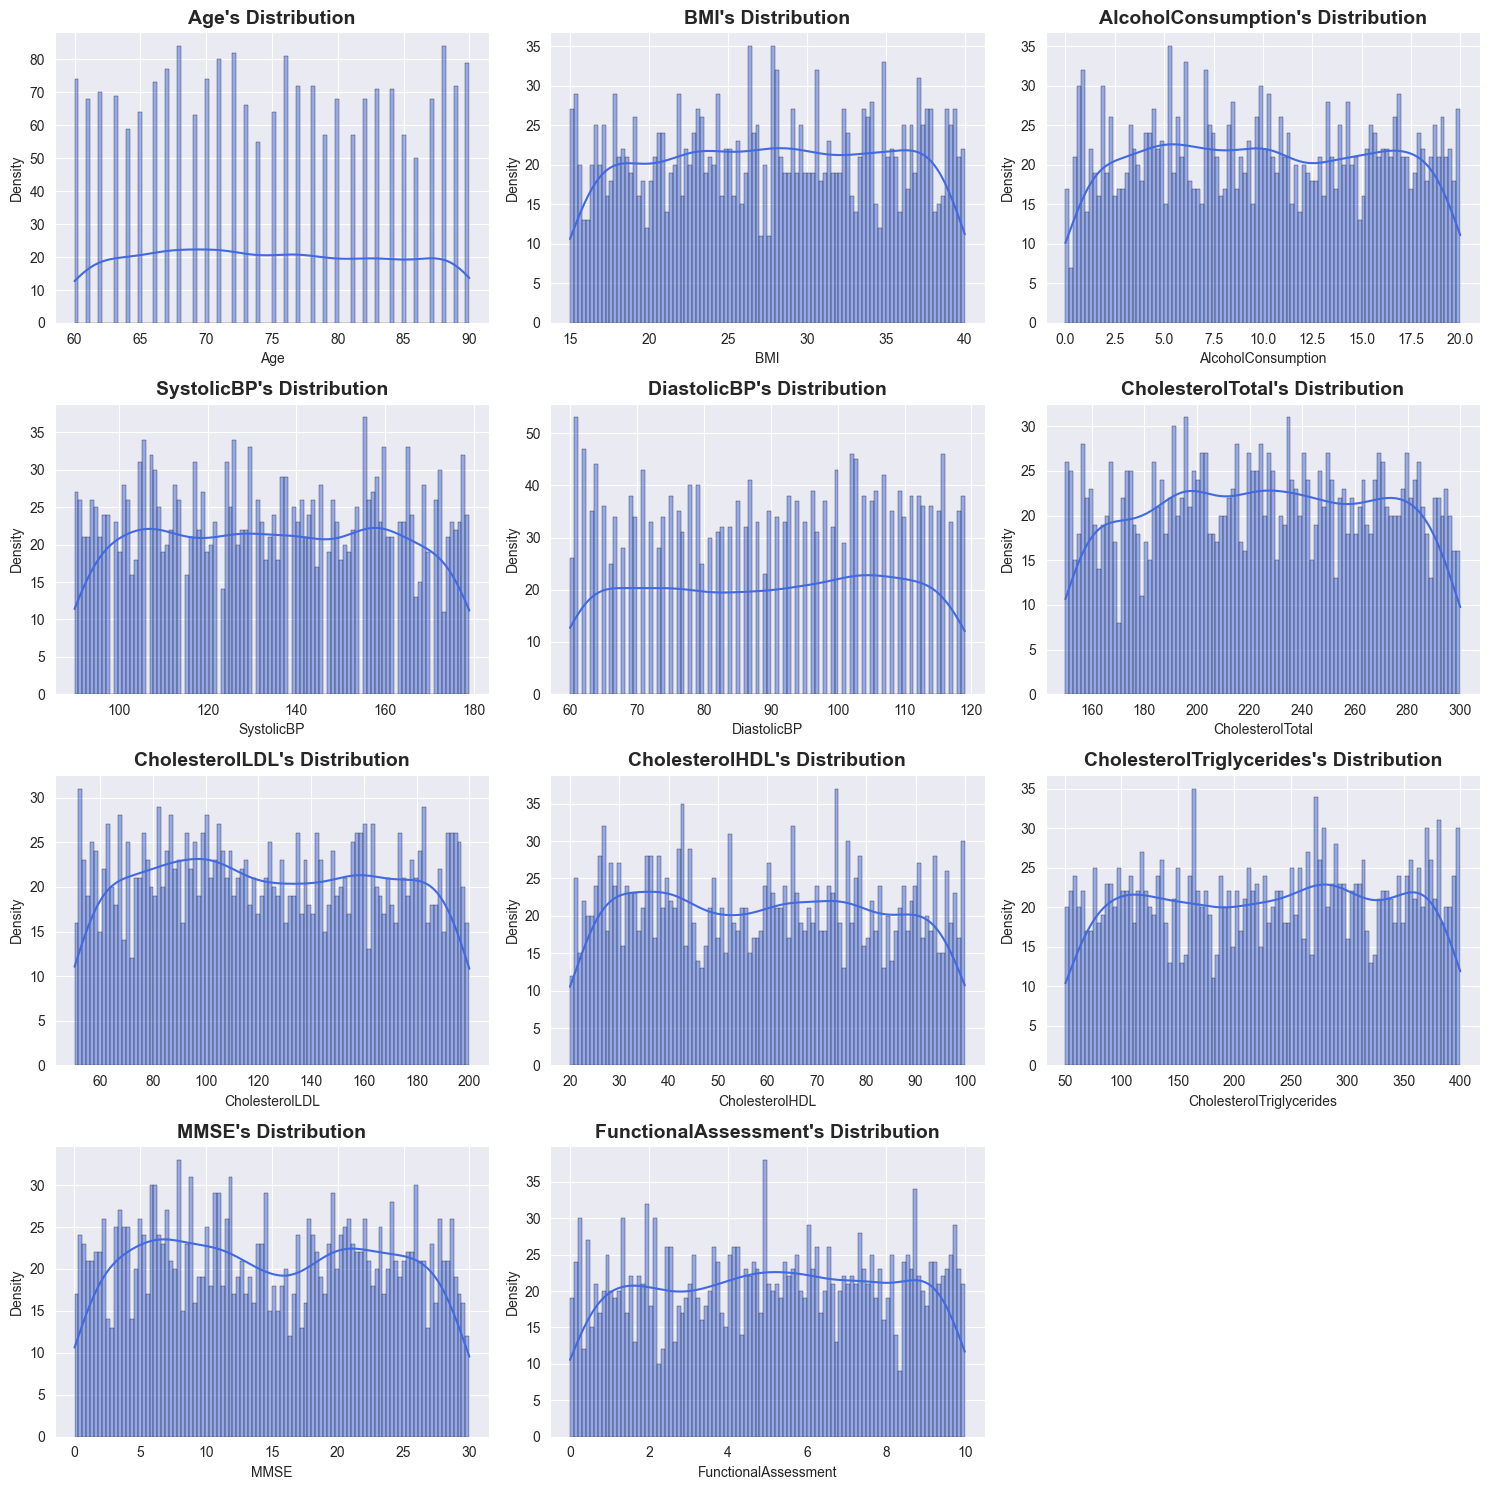

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
for i, var in enumerate(numeric_features[1:], 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[var],
                 bins=100,
                 kde=True,
                 color='royalblue',
                 edgecolor='black')
    plt.title(f"{var}'s Distribution",
              fontsize=14,
              weight="bold")
    plt.xlabel(var, fontsize=10)
    plt.ylabel("Density", fontsize=10)
plt.tight_layout()
plt.show()
plt.savefig('distributions.png')

# Boxplot

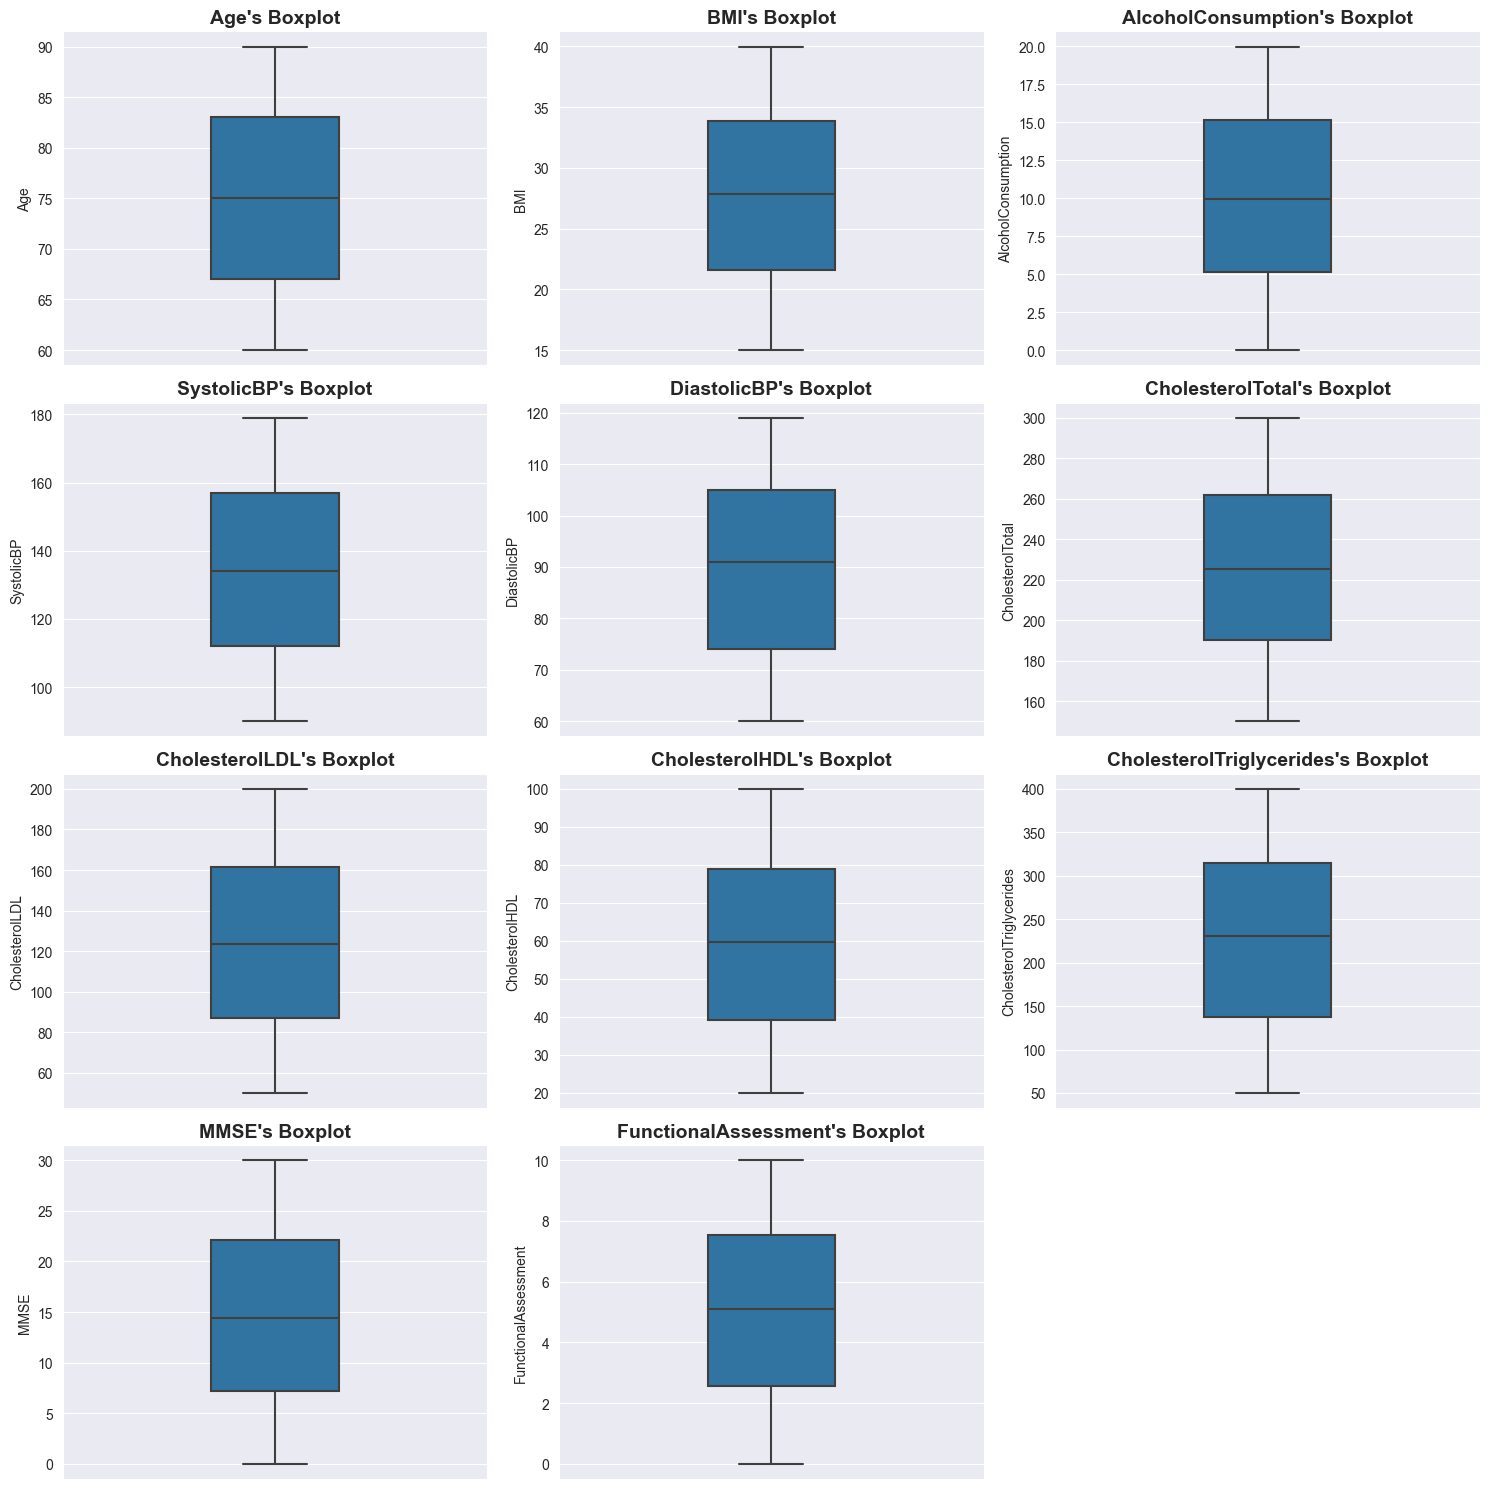

In [49]:
plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
for i, var in enumerate(numeric_features[1:], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data= df,
                y=var,
                width=0.3)
    plt.title(f"{var}'s Boxplot",
              fontsize=14,
              weight="bold")
plt.tight_layout()
plt.show()

# Heatmap

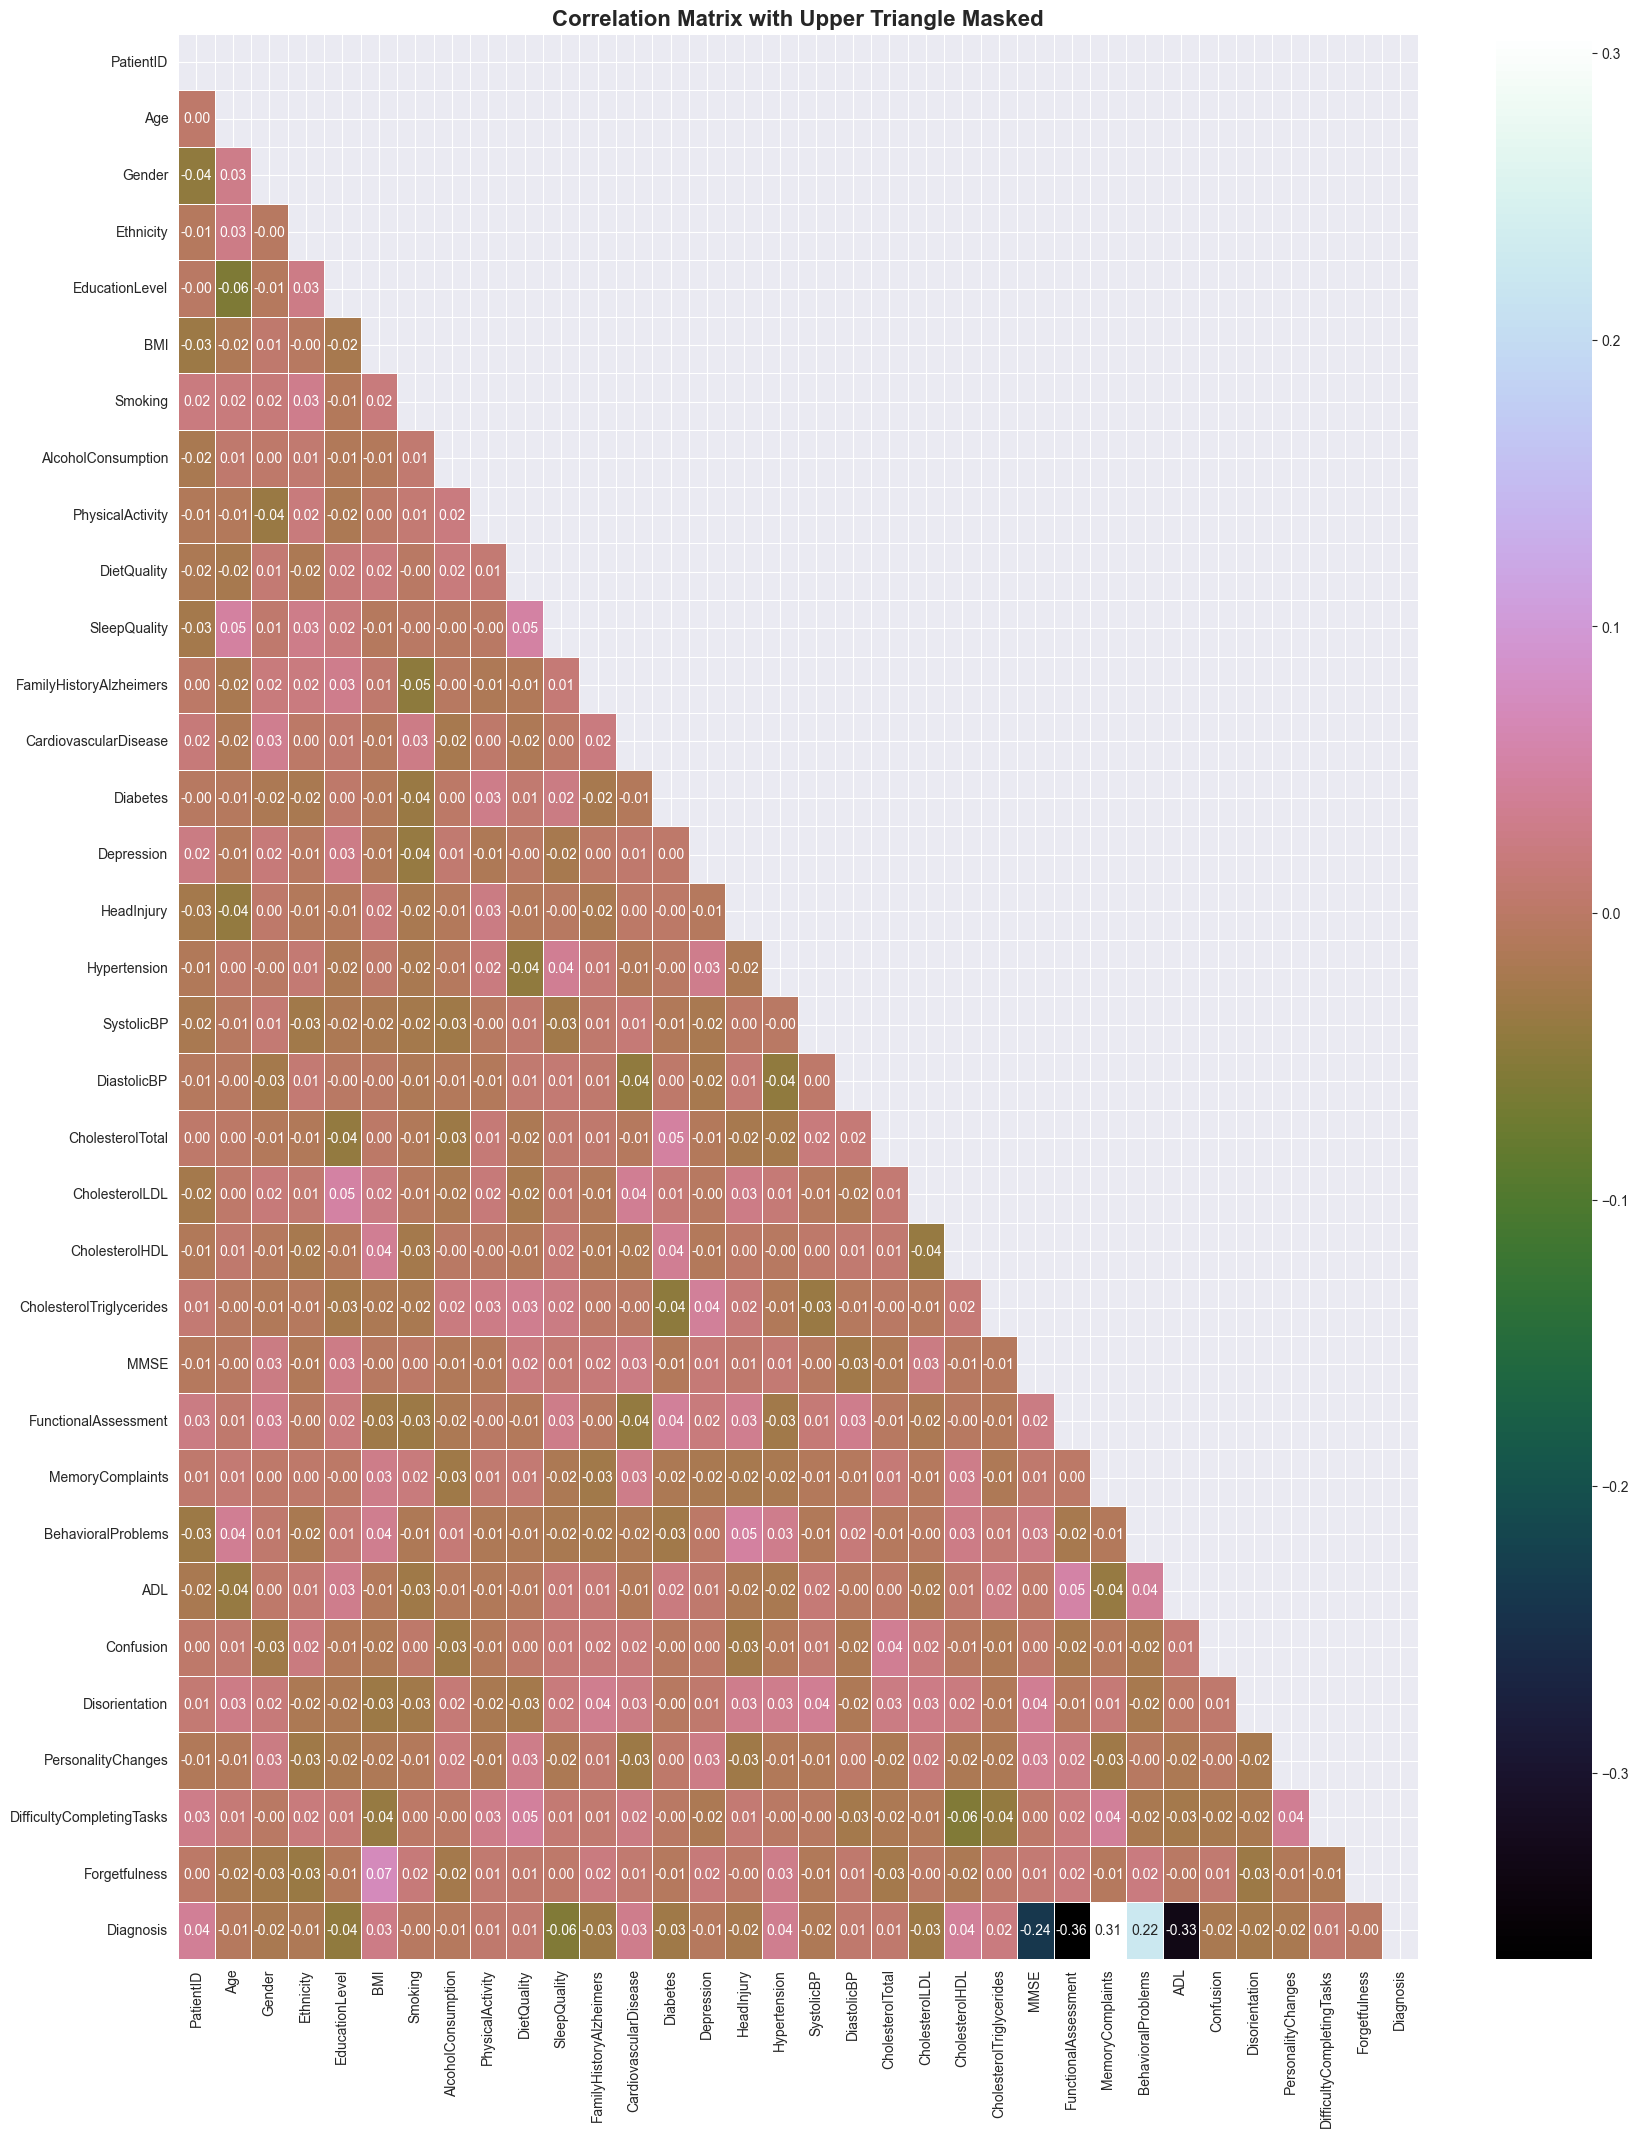

In [50]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20, 25))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="cubehelix", linewidths=0.5)
plt.title("Correlation Matrix with Upper Triangle Masked", fontsize=16, weight='bold')
plt.show()

# Prepare Data For Modeling
## Splitting dependent/Independent Variables

In [51]:
X = df.drop(['Diagnosis', 'PatientID'], axis=1).values
y = df['Diagnosis'].values

# PCA & Splitting Train/Test Sets

In [52]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

pca = PCA(12)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [53]:
print(f"X Train :{X_train.shape}")
print(f"X Test :{X_test.shape}")
print(f"y Train :{y_train.shape}")
print(f"y Test :{y_test.shape}")

X Train :(1719, 12)
X Test :(430, 12)
y Train :(1719,)
y Test :(430,)


# Scaling

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Definition

In [56]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# XGBoost

In [57]:
# Model Object
xgb_model = XGBClassifier()

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
    'scale_pos_weight': [1, 2, 5]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   scoring='roc_auc',  # Use AUC-ROC for binary classification
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the randomized search model on your dataset (X, y)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             0.9],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0, 0.01, 0.1, 1],
                                        'scale_pos_weight': [1, 2, 5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [58]:
best_params = random_search.best_params_

# Create the final XGBClassifier model with the best parameters
xgb_tuned = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')

# Train the final model on the full training data
xgb_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_tuned.predict(X_test)

# Get predicted probabilities (useful for ROC-AUC)
# y_pred_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7372093023255814
Confusion Matrix:
[[192  85]
 [ 28 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77       277
           1       0.60      0.82      0.69       153

    accuracy                           0.74       430
   macro avg       0.73      0.76      0.73       430
weighted avg       0.77      0.74      0.74       430



# Random Forest

In [59]:
# Define Model
rf_model = RandomForestClassifier()

# Define params for RandomizedSearch
params = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30, 40, 50],
    'max_samples': [None, 0.5, 0.75, 1.0]}

# Create the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(rf_model,
                                   param_distributions=params,
                                   n_iter=50,
                                   scoring='roc_auc',
                                   cv=5,
                                   verbose=3,
                                   random_state=42,
                                   n_jobs=-1)

# Fit the randomized search model on your dataset (X, y)
rf_random_search.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50],
                                        'max_samples': [None, 0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500, 1000]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [60]:
# Get best params from RandomizedSearch
best_param = rf_random_search.best_params_

# New RandomForest model
rf_tuned = RandomForestClassifier(**best_param)

# Training
rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.7813953488372093
Confusion Matrix:
[[253  24]
 [ 70  83]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       277
           1       0.78      0.54      0.64       153

    accuracy                           0.78       430
   macro avg       0.78      0.73      0.74       430
weighted avg       0.78      0.78      0.77       430



# ANN

In [61]:
import tensorflow as tf

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X Train :{X_train.shape}")
print(f"X Test :{X_test.shape}")
print(f"y Train :{y_train.shape}")
print(f"y Test :{y_test.shape}")

X Train :(1719, 32)
X Test :(430, 32)
y Train :(1719,)
y Test :(430,)


# Model Definition

In [63]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [64]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [65]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 634,625 (2.42 MB)

 Trainable params: 634,625 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
# Define early stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=30,
                                              restore_best_weights=True)

In [67]:
hist = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_test, y_test),
    # callbacks = [early_stop],
    epochs = 100,
    batch_size = 64)

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5567 - loss: 2.0590 - val_accuracy: 0.6442 - val_loss: 0.6597
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5900 - loss: 0.6879 - val_accuracy: 0.6442 - val_loss: 0.6513
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6433 - loss: 0.6507 - val_accuracy: 0.6442 - val_loss: 0.6504
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6209 - loss: 0.6624 - val_accuracy: 0.6442 - val_loss: 0.6499
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6370 - loss: 0.6672 - val_accuracy: 0.6442 - val_loss: 0.6508
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6542 - loss: 0.6511 - val_accuracy: 0.6442 - val_loss: 0.6458
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6480 - loss: 0.6470 - val_accuracy: 0.6442 - val_loss: 0.6512
Epoch 8/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6475 - loss: 0.6524 - val_accuracy: 0.

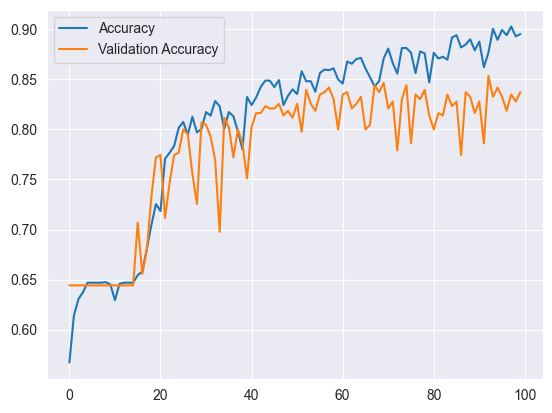

In [68]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()

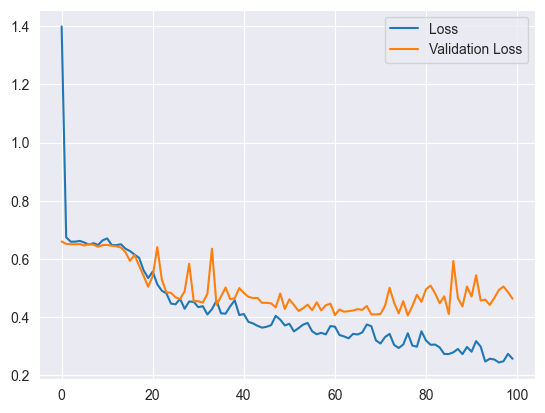

In [69]:
plt.plot(hist.history['loss'], label='Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()

In [70]:
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1)
y_pred = np.round(y_pred_prob).astype(int)  # Rounding probabilities to get 0 or 1
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the results
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8448 - loss: 0.4344 
Accuracy: 83.72%
Confusion Matrix:
[[250  27]
 [ 43 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       277
           1       0.80      0.72      0.76       153

    accuracy                           0.84       430
   macro avg       0.83      0.81      0.82       430
weighted avg       0.84      0.84      0.84       430



# Save Model

In [71]:
# Save pickle
import pickle

with open("model.pkl","wb") as file1:
  pickle.dump(model,file1)

In [72]:
# Save h5
model.save('ann.h5')